<h1>Assignment 2: Linear Regression and Classification</h1>
<h4> COMP 551 Winter 2025, McGill University</h4>
by <i>Melody Mantegh - Junghoon Cho - Axel Refalo</i>
<br/></br/><br />
In this assignment, we implemented linear regression, logistic regression, and multiclass classification and evaluated these algorithms on two tabular datasets:
<ol>
    <li>
        <h4><a href="https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic">The Breast Cancer Wisconsin Dataset</a></h4>
        <p>
            The dataset contains 30 continuous features to predict binary <b>Diagnosis</b> target variable of malignant (1) or benign (0) tumor. There are 569 examples. The 30 numeric features were derived from digitized images of fine needle aspirate (FNA) of breast masses, such aas radius, texture, smoothness, and compactness.
        </p>
    </li>
    <li>
        <h4><a href="https://archive.ics.uci.edu/dataset/109/wine">Wine Recognition Dataset</a></h4>
        <p>
            The task is to predict the three types of wines (i.e., <b>class</b> target variable) based on the quantities of 13 continuous features (e.g., the concentration of chemical constituents).
        </p>
    </li>
</ol>
<br/>
<h4>Contents</h4>
<ol>
    <li><b>Acquire, Preprocess, and Analyze the data</b>
        <ol>
            <li>Loading the Dataset</li>
            <li>Handle Missing Values</li>
            <li>Standardizing Features</li>
            <li>Feature Importance</li>
        </ol>
    </li>
    <li><b>Implement Linear Regression Models</b>
    </li>
    <li><b>Implement Logistic and Multiclass Classifiers</b>
        <ol>
            <li>Implement Logistic Regression</li>
            <li>Implement Multiclass Classification</li>
        </ol>
    </li>
    <li><b>Running Experiments</b>
        <ol>
            <li>Gradient Checking on Logistic Regression Models</li>
            <li>Find the best iteration on Gradient Descent</li>
            <li>Plot AUROC on each model</li>
            <li>Compare the Binary Regression Coefficient and Multiple Linear Regression Coefficient using <b>Barplot</b></li>
            <li>Compare the Multi-class logistic Coefficient and Multiple Linear Regression Coefficient using <b>Heatmap</b></li>
        </ol>
    </li>
    <li><b>Optional Experiments</b>
        <ol>
            <li>Compare the accuracies with KNN and Decision Trees</li>
        </ol>
    </li>
</ol>
<br />
<hr>
<hr>
<h2>1. (A) Acquire, Preprocess, and Analyze the data using <b>Breast Cancer Dataset</b></h2>
<h3>1.A.a - Load the dataset</h3>

In [87]:
!pip install ucimlrepo

In [88]:
# Import all the required library
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score

In [89]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X_bc = breast_cancer_wisconsin_diagnostic.data.features
y_bc= breast_cancer_wisconsin_diagnostic.data.targets

print("X.shape:", X_bc.shape)
print("y.shape:", y_bc.shape)

print(X_bc.info())

# Convert Target value into binary
map_target = {"M": 1, "B": 0}
y_bc['Diagnosis'] = y_bc['Diagnosis'].map(map_target)
print(y_bc.value_counts())

X.shape: (569, 30)
y.shape: (569, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        

/var/folders/py/fq19f9m93jdgvmyxf67rxz3h0000gn/T/ipykernel_10179/3483002324.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_bc['Diagnosis'] = y_bc['Diagnosis'].map(map_target)


<hr>
<h3>1.A.b - Handle Missing values</h3>

In [90]:
print("Missing values in X:\n",X_bc.isnull().sum())
print("\nMissing values in y:\n",y_bc.isnull().sum())

Missing values in X:
 radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

Missing values in y:
 Diagnosis    0
dtype: int64


After inspecting the dataset, there are **no missing values** present. This indicates that the data is complete and does not require imputation or removal of any entries.
<hr>
<h3>1.A.c - Standardize the Features</h3>

In [91]:
# Initialize Standard Scaler
scaler = StandardScaler()
X_scaled_bc = scaler.fit_transform(X_bc)
X_scaled_df_bc = pd.DataFrame(X_scaled_bc, columns=X_bc.columns)

print(X_scaled_df_bc.describe())

# Concatenate the feature data with the target data
breast_cancer_df = pd.concat([X_scaled_df_bc, y_bc], axis=1)

            radius1      texture1    perimeter1         area1   smoothness1  \
count  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02   
mean  -1.373633e-16  6.868164e-17 -1.248757e-16 -2.185325e-16 -8.366672e-16   
std    1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00 -1.984504e+00 -1.454443e+00 -3.112085e+00   
25%   -6.893853e-01 -7.259631e-01 -6.919555e-01 -6.671955e-01 -7.109628e-01   
50%   -2.150816e-01 -1.046362e-01 -2.359800e-01 -2.951869e-01 -3.489108e-02   
75%    4.693926e-01  5.841756e-01  4.996769e-01  3.635073e-01  6.361990e-01   
max    3.971288e+00  4.651889e+00  3.976130e+00  5.250529e+00  4.770911e+00   

       compactness1    concavity1  concave_points1     symmetry1  \
count  5.690000e+02  5.690000e+02     5.690000e+02  5.690000e+02   
mean   1.873136e-16  4.995028e-17    -4.995028e-17  1.748260e-16   
std    1.000880e+00  1.000880e+00     1.000880e+00  1.000880e+00   
min   -1.610136e

<hr>
<h3>1.A.d - Feature Importance</h3>
We used <b>Simple Regression</b> to separately compute feature importance for each input variables.

Since the features are standardized, the **Pearson Correlation Coefficient (PCC)** is the same as the simple regression coefficient:


$$W = \frac{1}{N} X^T y$$

Where:
- $ W $ : The coefficient vector (feature importance).
- $ N $ : The number of samples.
- $ X^T $ : The transpose of the standardized feature matrix.
- $ y $ : The standardized target vector.


In [92]:
class SimpleRegression:
    def __init__(self):
        self.coef = None

    def fit(self, X_train, y_train):
        self.X = np.asarray(X_train)
        self.y = np.asarray(y_train)
        N = self.X.shape[0]

        self.coef = np.dot(self.X.T, self.y) / N

    def get_coef(self):
        return self.coef

When computing feature importance using simple regression, we must <b>only use the training data</b>, not the full dataset.

               Feature  Importance
14         smoothness2   -0.038667
9   fractal_dimension1   -0.014477
11            texture2   -0.011064
18           symmetry2   -0.004664
19  fractal_dimension2    0.013880
16          concavity2    0.108699
15        compactness2    0.115025
29  fractal_dimension3    0.142510
8            symmetry1    0.154756
17     concave_points2    0.173343
4          smoothness1    0.176739
1             texture1    0.200357
28           symmetry3    0.215718
24         smoothness3    0.216419
21            texture3    0.230752
13               area2    0.262152
12          perimeter2    0.267725
25        compactness3    0.271005
5         compactness1    0.276828
10             radius2    0.278463
26          concavity3    0.308660
6           concavity1    0.325681
3                area1    0.342015
0              radius1    0.352021
23               area3    0.356168
2           perimeter1    0.356577
7      concave_points1    0.372287
20             radiu

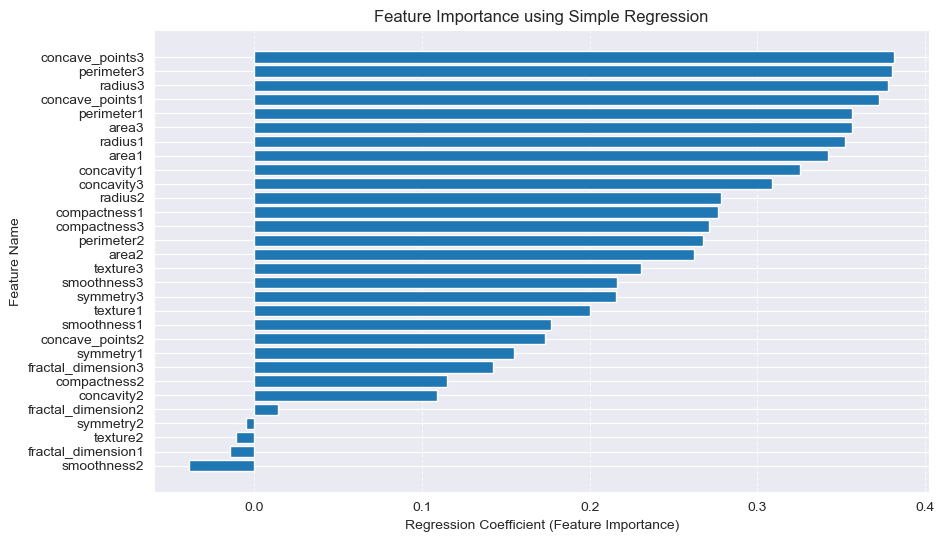

In [93]:
# Split the datasets into Training and Test set
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_scaled_df_bc, y_bc, test_size=0.3, random_state=42, stratify=y_bc)

# Initialize the Simple Regression
simple_regression = SimpleRegression()
simple_regression.fit(X_train_bc, y_train_bc)  # Fit standardized data

feature_importance = simple_regression.get_coef().flatten() # Get coefficient of the feature importance

# Display feature importance using pandas
importance_df_bc = pd.DataFrame({
    'Feature': X_scaled_df_bc.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=True)

print(importance_df_bc)

plt.figure(figsize=(10, 6))
plt.barh(importance_df_bc['Feature'], importance_df_bc['Importance'])
plt.xlabel('Regression Coefficient (Feature Importance)')
plt.ylabel('Feature Name')
plt.title('Feature Importance using Simple Regression')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

From the plot, we divide a feature into 4 levels:
-  top_features = `["concave_points3", "perimeter3", "concave_points1", "radius3", "perimeter1", "area3", "radius1", "area1", "concavity1", "concavity3"]`
- sec_top_features = `["compactness1", "compactness3", "radius2", "perimeter2", "area2", "texture3", "smoothness3"]`
- sec_bottom_features = `["symmetry3", "texture1", "concave_points2", "compactness2", "symmetry1", "smoothness1", "concavity2"]`
- bottom_features = `["fractal_dimension2", "symmetry2", "texture2","fractal_dimension1", "smoothness2"]`

And we realized that bottom_features like `fractal_dimension2`, `symmetry2`, `texture2`, `fractal_dimension1`, `smoothness2` is less important compared to other features.

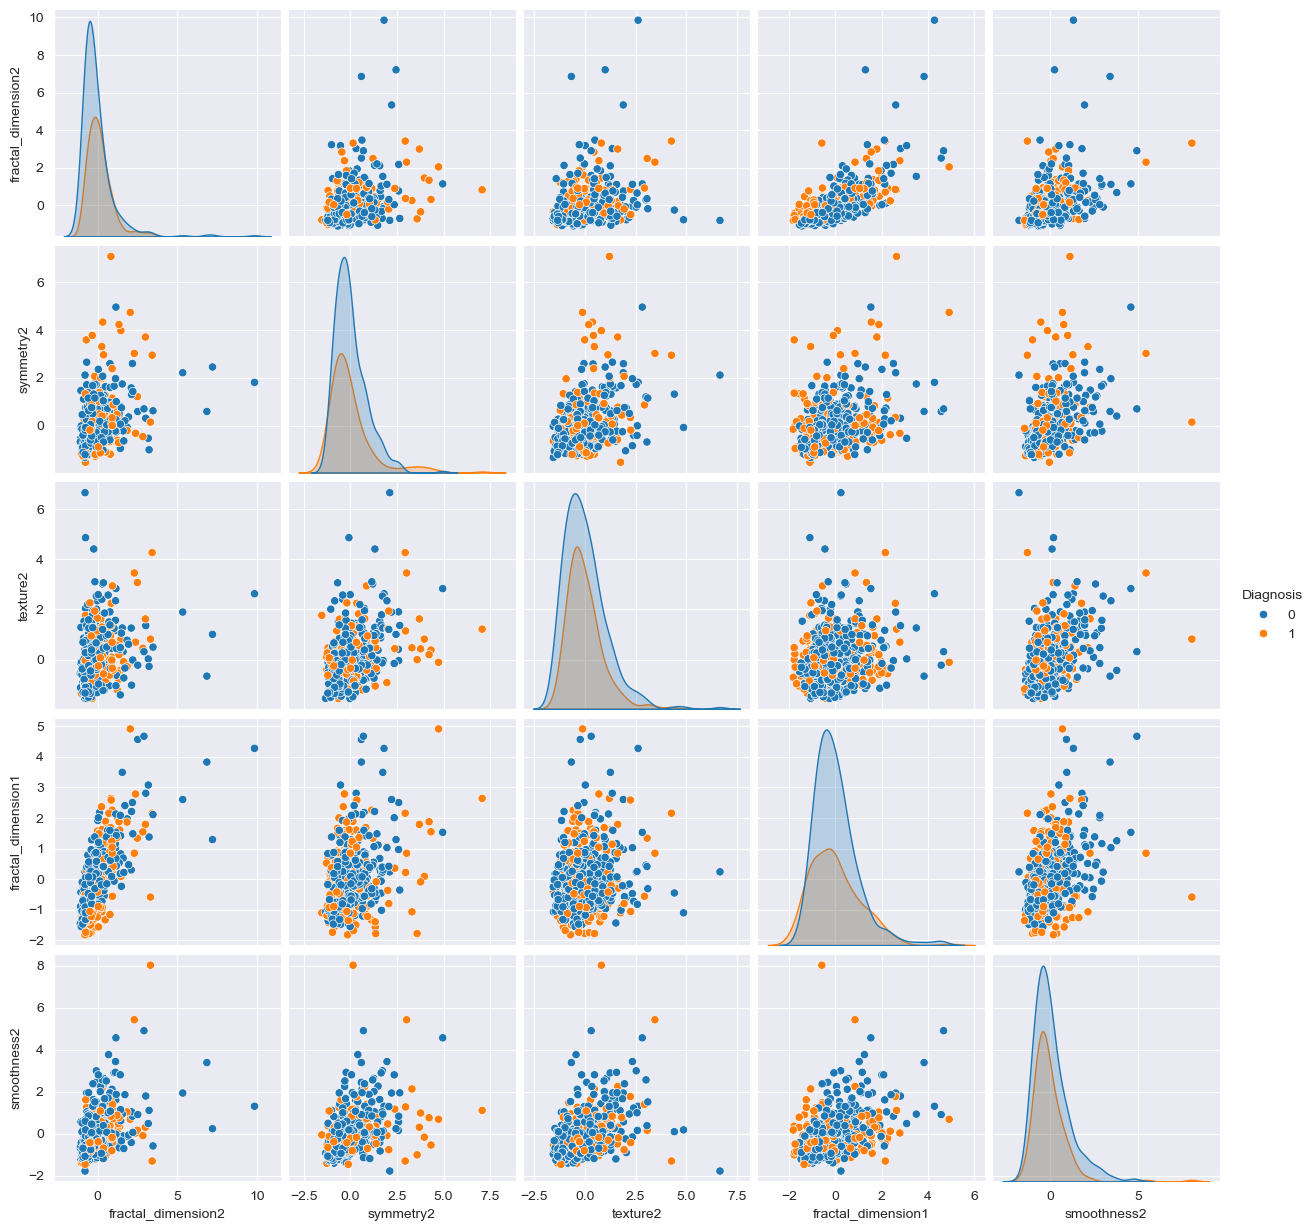

In [94]:
bottom_features = ["fractal_dimension2", "symmetry2", "texture2","fractal_dimension1", "smoothness2"]

df_bc_bottom = breast_cancer_df[bottom_features + ["Diagnosis"]]

sns.pairplot(df_bc_bottom, hue="Diagnosis", diag_kind="kde")
plt.savefig("figures/Correlation between irrelevant features.png")
plt.show()

The following bottom features shows no separation and no trends. Therefore, we <b>remove</b> these features when training.

In [95]:
important_features = ["concave_points3", "perimeter3", "concave_points1", "radius3", "perimeter1", "area3", "radius1", "area1", "concavity1", "concavity3", "compactness1", "compactness3", "radius2", "perimeter2", "area2", "texture3", "smoothness3", "symmetry3", "texture1", "concave_points2", "compactness2", "symmetry1", "smoothness1", "concavity2"]

X_selected_bc = X_scaled_df_bc[important_features]

# Split Data into Train, Cross-Validation and Test set
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_selected_bc, y_bc, test_size=0.3, random_state=42, stratify=y_bc)
X_val_bc, X_test_bc, y_val_bc, y_test_bc = train_test_split(X_test_bc, y_test_bc, test_size=0.5, random_state=42, stratify=y_test_bc)

print(f"X_train shape: {X_train_bc.shape}")
print(f"y_train shape: {y_train_bc.shape}")
print(f"y_val shape: {y_val_bc.shape}")
print(f"X_val shape: {X_val_bc.shape}")
print(f"X_test shape: {X_test_bc.shape}")
print(f"y_test shape: {y_test_bc.shape}")

X_train shape: (398, 24)
y_train shape: (398, 1)
y_val shape: (85, 1)
X_val shape: (85, 24)
X_test shape: (86, 24)
y_test shape: (86, 1)


---
<h2>1. (B) Acquire, Preprocess, and Analyze the data using <b>Wine Recognition</b></h2>
<h3>1.B.a - Load the dataset</h3>

In [96]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_dataset = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X_wr = wine_dataset.data.features
y_wr = wine_dataset.data.targets

# print the fetched data
print("X.shape data: ", X_wr.shape)
print("y.shape data: ", y_wr.shape)

print(X_wr.info(),"\n")
print(y_wr.value_counts())

X.shape data:  (178, 13)
y.shape data:  (178, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline        

<hr>
<h3>1.B.b - Handle Missing Values</h3>

In [97]:
print("Missing values in X:\n", X_wr.isnull().sum())
print("\nMissing values in y:\n", y_wr.isnull().sum())

Missing values in X:
 Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

Missing values in y:
 class    0
dtype: int64


After inspecting the dataset, there are **no missing values** present. This indicates that the data is complete and does not require imputation or removal of any entries.
<hr>
<h3>1.B.c - Standardize the Features</h3>

In [98]:
# We re-use the scaler that we initialized above
X_scaled_wr = scaler.fit_transform(X_wr)
X_scaled_df_wr = pd.DataFrame(X_scaled_wr, columns=X_wr.columns)
print("X_scaled DataFrame:\n",X_scaled_df_wr.describe(), "\n")

# Use One-Hot encoder on the target value that has three different categorical value
encoder = OneHotEncoder(sparse_output=False)
encoded_target = encoder.fit_transform(y_wr[['class']])
encoded_target_df = pd.DataFrame(encoded_target, columns=encoder.get_feature_names_out(['class']))
print("Encoded Target:\n",encoded_target_df.describe())

wine_df = pd.concat([X_scaled_df_wr, encoded_target_df], axis=1)

X_scaled DataFrame:
             Alcohol     Malicacid           Ash  Alcalinity_of_ash  \
count  1.780000e+02  1.780000e+02  1.780000e+02       1.780000e+02   
mean  -8.382808e-16 -1.197544e-16 -8.370333e-16      -3.991813e-17   
std    1.002821e+00  1.002821e+00  1.002821e+00       1.002821e+00   
min   -2.434235e+00 -1.432983e+00 -3.679162e+00      -2.671018e+00   
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01      -6.891372e-01   
50%    6.099988e-02 -4.231120e-01 -2.382132e-02       1.518295e-03   
75%    8.361286e-01  6.697929e-01  6.981085e-01       6.020883e-01   
max    2.259772e+00  3.109192e+00  3.156325e+00       3.154511e+00   

          Magnesium  Total_phenols    Flavanoids  Nonflavanoid_phenols  \
count  1.780000e+02     178.000000  1.780000e+02          1.780000e+02   
mean  -3.991813e-17       0.000000 -3.991813e-16          3.592632e-16   
std    1.002821e+00       1.002821  1.002821e+00          1.002821e+00   
min   -2.088255e+00      -2.107246 -1.695971e+00    

<hr>
<h3>1.B.d - Feature Importance</h3>

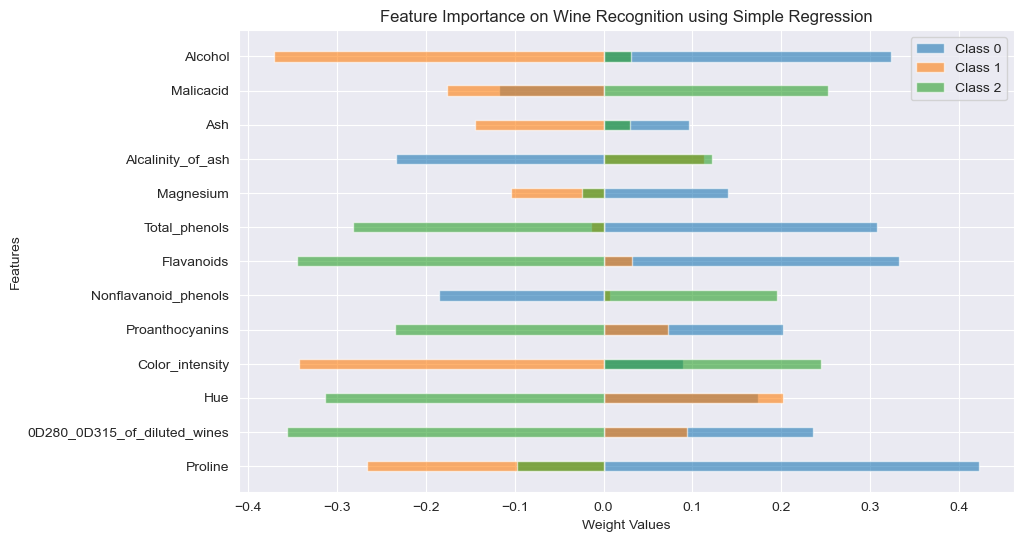

In [99]:
# Split the datasets into Training and Test set
X_train_wr, X_test_wr, y_train_wr, y_test_wr = train_test_split(X_scaled_df_wr, encoded_target_df, test_size=0.2, random_state=42, stratify=encoded_target_df)

# Fit Wine data into simple regression
simple_regression.fit(X_train_wr, y_train_wr)
feature_importance_wr = simple_regression.get_coef()

y = np.arange(len(X_scaled_df_wr.columns))
plt.figure(figsize=(10, 6))

for i in range(3):
    plt.barh(y, feature_importance_wr[:, i], height=0.3, alpha=0.6, label=f'Class {i}')

plt.yticks(y, X_scaled_df_wr.columns)
plt.ylabel("Features")
plt.xlabel("Weight Values")
plt.legend()
plt.title('Feature Importance on Wine Recognition using Simple Regression')
plt.gca().invert_yaxis()
plt.show()

In [100]:
X_train_wr, X_test_wr, y_train_wr, y_test_wr = train_test_split(X_scaled_df_wr, encoded_target_df, test_size=0.2, random_state=42, stratify=y_wr)
X_val_wr, X_test_wr, y_val_wr, y_test_wr = train_test_split(X_test_wr, y_test_wr, test_size=0.5, random_state=42, stratify=y_test_wr)

print(f"X_train shape: {X_train_wr.shape}")
print(f"y_train shape: {y_train_wr.shape}")
print(f"y_val shape: {y_val_wr.shape}")
print(f"X_val shape: {X_val_wr.shape}")
print(f"X_test shape: {X_test_wr.shape}")
print(f"y_test shape: {y_test_wr.shape}")

X_train shape: (142, 13)
y_train shape: (142, 3)
y_val shape: (18, 3)
X_val shape: (18, 13)
X_test shape: (18, 13)
y_test shape: (18, 3)


The analysis reveals that Proline, Alcohol, and Color Intensity are the most significant features, strongly influencing classification across all wine classes. Flavanoids, Hue, and Total Phenols also contribute meaningfully but to a lesser extent.

In contrast, features like Ash, Malic Acid, and Nonflavanoid Phenols show minimal impact on classification, suggesting they play a lesser role in distinguishing wine types.

Overall, we will remove some irrelevant feature during cross-validation.
<br /><br />
<hr>
<hr>
<h3>Helper Function</h3>

In [101]:
def cross_validate(model, X_input, y_output):
    X_input = np.asarray(X_input)
    y_output = np.asarray(y_output)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    y = np.zeros_like(y_output)
    yh = np.zeros_like(y_output, dtype=np.float64)

    for train_index, test_index in kf.split(X_input):
        model.fit(X_input[train_index], y_output[train_index])
        y[test_index] = y_output[test_index]
        predictions = model.predict(X_input[test_index])

        # _, num_categories = predictions.shape

        # if num_categories > 1: # probabilities
        #     yh[test_index] = predictions
        # else:   # Already class labels
            # yh[test_index] = predictions.flatten()
        yh[test_index] = predictions
    return y, yh

In [102]:
class GradientDescent:
    def __init__(self, learning_rate=0.005, max_iter=1e4, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.epsilon = epsilon

    def set_learning_rate(self, learning_rate):
        self.learning_rate = learning_rate

    def set_max_iter(self, max_iter):
        self.max_iter = max_iter

    def set_epsilon(self, epsilon):
        self.epsilon = epsilon

    def gradient_descent(self, gradient_fn, loss_fn, X, y, w=None):
        _, n_features = X.shape

        # Initialize weights if not provided
        if w is None:
            w = np.random.randn(n_features, 1) # Random Normal Distribution

        prev_loss = loss_fn(X, y, w)
        loss_history = []

        for i in range(int(self.max_iter)):
            gradient = gradient_fn(X, y, w) # Compute gradient
            w_new = w - self.learning_rate * gradient

            cur_loss = loss_fn(X, y, w_new) # Compute new loss
            loss_history.append(cur_loss)
            # Check for convergence
            if  abs(prev_loss - cur_loss) < self.epsilon:
                break

            prev_loss = cur_loss # Update loss value
            w = w_new   # Update weights

        return w, loss_history

In [103]:
def train_with_validation(model, X_train, y_train, X_val, y_val, gradient_descent, val_interval=100):
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train.reset_index(drop=True)).reshape(-1, 1)
    X_val   = np.asarray(X_val)
    y_val   = np.asarray(y_val.reset_index(drop=True)).reshape(-1, 1)

    if model.add_bias:
        X_train = np.column_stack([np.ones(X_train.shape[0]), X_train])
        X_val = np.column_stack([np.ones(X_val.shape[0]), X_val])

    # Initialize the weights
    n_features = X_train.shape[1]
    w = np.random.randn(n_features, 1)

    train_loss_history = []
    val_loss_history = []

    # Initial loss
    train_loss = model.loss_fn(X_train, y_train, w)
    val_loss = model.loss_fn(X_val, y_val, w)
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    prev_loss = train_loss

    for i in range(int(gradient_descent.max_iter)):
        gradient = model.gradient_fn(X_train, y_train, w)
        w -= gradient_descent.learning_rate * gradient
        current_loss = model.loss_fn(X_train, y_train, w)

        if i % val_interval == 0:
            train_loss_history.append(current_loss)
            val_loss = model.loss_fn(X_val, y_val, w)
            val_loss_history.append(val_loss)

        if abs(prev_loss - current_loss) < gradient_descent.epsilon:
            break

        prev_loss = current_loss

    return train_loss_history, val_loss_history

In [104]:
def plot_gradient_loss(loss_history, loss_label, color_list=None):
    if color_list is None:
        color_list = []
        for i in range(len(loss_history)):
            color_list.append('blue')

    plt.figure(figsize=(10, 6))
    for i, loss in enumerate(loss_history):
        plt.plot(loss, label=loss_label[i], color=color_list[i])
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss Convergence Over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [105]:
def plot_auroc(models_data, title="AUROC Comparison"):
    plt.figure(figsize=(10, 6))

    for y_true, y_hat, label in models_data:
        fpr, tpr, _ = roc_curve(y_true, y_hat)
        auc_val = roc_auc_score(y_true, y_hat)
        plt.plot(fpr, tpr, lw=2, label=f"{label} (AUROC={auc_val:.3f})")

    plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

---
---
<h3>2. Implement Linear Regression</h3>

In [106]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias

    def loss_fn(self, X, y, w):
        y_hat = X @ w  # continuous predictions
        return np.sum((y - y_hat) ** 2)

    def gradient_fn(self, X, y, w):
        y_hat = X @ w  # continuous predictions
        return (2 / X.shape[0]) * X.T @ (y_hat - y)

    def fit(self, X, y, gradient_descent=GradientDescent().gradient_descent):
        X = np.asarray(X)
        y = np.asarray(y)

        if self.add_bias:   # Add bias into X
            X = np.column_stack([np.ones(X.shape[0]), X])

        A = X.T @ X
        y = y.reshape(-1, 1)

        if np.linalg.det(A) > 1e-12:   # Check if matrix A is invertible
            self.w = np.linalg.inv(A) @ X.T @ y
            loss_history = None
        else: # A is singular, use optimization function to fit.
            self.w, loss_history = gradient_descent(self.gradient_fn, self.loss_fn, X, y)
        return loss_history

    def predict(self, x):
        x = np.asarray(x)

        if self.add_bias: # Add a bias term
            x = np.column_stack([np.ones(x.shape[0]), x])
        y_hat = x @ self.w
        return y_hat

    def accuracy(self, y, y_hat, threshold=0.5):
        y_hat = np.array([1 if val > threshold else 0 for val in y_hat])
        y_hat = np.asarray(y_hat).flatten()
        y = np.asarray(y).flatten()

        if len(y_hat) != len(y):
            print("y_hat and y have different length")
            return

        return np.sum(y_hat == y) / len(y_hat)

---
---
<h3>3. Implement Logistic Regression and Multi-Class Classification

In [107]:
class LogisticRegression:
    def __init__(self, add_bias=True, is_multi_class=False):
        self.add_bias = add_bias
        self.is_multi_class = is_multi_class

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def loss_fn(self, X, y, w):
        eps = 1e-20
        y_hat = self.sigmoid(X @ w)

        loss = -y * np.log(y_hat + eps) - (1 - y) * np.log(1 - y_hat + eps)
        return np.mean(loss)

    def get_coef(self):
        return self.w

    def set_coef(self, coef):
        self.w = coef

    def gradient_fn(self, X, y, w):
        y_hat = self.sigmoid(X @ w)
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        return (1 / X.shape[0]) * X.T @ (y_hat - y)

    def fit(self, X, y, gradient_descent=GradientDescent().gradient_descent):
        X = np.asarray(X)
        y = np.asarray(y)

        if self.add_bias:   # Add bias into X
            X = np.column_stack([np.ones(X.shape[0]), X])

        self.w, loss_history = gradient_descent(self.gradient_fn, self.loss_fn, X, y)
        return loss_history

    def predict(self, x):
        x = np.asarray(x)

        if self.add_bias: # Add a bias term
            x = np.column_stack([np.ones(x.shape[0]), x])

        y_hat = self.sigmoid(x @ self.w)
        return y_hat

    def accuracy(self, y, y_hat, threshold=0.5):
        y_hat = np.array([1 if val > threshold else 0 for val in y_hat])
        y_hat = np.asarray(y_hat).flatten()
        y = np.asarray(y).flatten()

        if len(y_hat) != len(y):
            print("y_hat and y have different length")
            return

        return np.mean(y_hat == y)

    def check_grad(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)

        if self.add_bias:   # Add bias to X
            X_bias = np.column_stack([np.ones(X.shape[0]), X])
        else:
            X_bias = X

        W = self.w.copy()
        diff = np.zeros_like(W)
        epsilon_val = 1e-4

        D, C = W.shape

        for i in range(D):
            for j in range(C):
                epsilon = np.zeros_like(W)
                epsilon[i, j] = epsilon_val

                W_plus = W + epsilon
                W_minus = W - epsilon
                J1 = self.loss_fn(X_bias, y, W_plus)
                J2 = self.loss_fn(X_bias, y, W_minus)

                numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
                derived_grad = self.gradient_fn(X_bias, y, W)[i, j]

                diff[i, j] = np.square(derived_grad - numeric_grad).sum() / np.square(derived_grad + numeric_grad).sum()

        return diff.sum()

In [108]:
class MultiClassLinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias

    def loss_fn(self, X, y, w):
        y_hat = X @ w  # continuous predictions
        return np.sum((y - y_hat) ** 2)

    def gradient_fn(self, X, y, w):
        y_hat = X @ w  # continuous predictions
        return (2 / X.shape[0]) * X.T @ (y_hat - y)

    def softmax(self, x):
        exp_z = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)


    def fit(self, X, y, gradient_descent=GradientDescent().gradient_descent):
        X = np.asarray(X)
        y = np.asarray(y)

        if self.add_bias:   # Add bias into X
            X = np.column_stack([np.ones(X.shape[0]), X])

        A = X.T @ X
        # y = y.reshape(-1, 1)

        if np.linalg.det(A) > 1e-12:   # Check if matrix A is invertible
            self.w = np.linalg.inv(A) @ X.T @ y
            loss_history = None
        else: # A is singular, use optimization function to fit.
            self.w, loss_history = gradient_descent(self.gradient_fn, self.loss_fn, X, y)
        return loss_history

    def get_weights(self):
        return self.w

    def predict(self, x):
        x = np.asarray(x)

        if self.add_bias: # Add a bias term
            x = np.column_stack([np.ones(x.shape[0]), x])
        y_hat = x @ self.w
        return self.softmax(y_hat)

    def accuracy(self, y, y_hat):
        max_indices = np.argmax(y_hat, axis=1)
        y_one_hot = np.zeros_like(y_hat)
        y_one_hot[np.arange(y_hat.shape[0]), max_indices] = 1
        y = np.asarray(y)

        return np.mean(y_one_hot == y)

    def check_grad(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)

        if self.add_bias:   # Add bias to X
            X_bias = np.column_stack([np.ones(X.shape[0]), X])
        else:
            X_bias = X

        W = self.w.copy()
        diff = np.zeros_like(W)
        epsilon_val = 1e-4

        D, C = W.shape

        for i in range(D):
            for j in range(C):
                epsilon = np.zeros_like(W)
                epsilon[i, j] = epsilon_val

                W_plus = W + epsilon
                W_minus = W - epsilon
                J1 = self.loss_fn(X_bias, y, W_plus)
                J2 = self.loss_fn(X_bias, y, W_minus)

                numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
                derived_grad = self.gradient_fn(X_bias, y, W)[i, j]

                diff[i, j] = np.square(derived_grad - numeric_grad).sum() / np.square(derived_grad + numeric_grad).sum()

        return diff.sum()

In [109]:
class MultiClassLogisticRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias

    def softmax(self, x):
        exp_z = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_z / exp_z.sum(axis=1, keepdims=True)

    def loss_fn(self, X, y, w):
        eps = 1e-20
        y_hat = self.softmax(X @ w)

        loss = -np.sum(y * np.log(y_hat + eps), axis=1)
        return np.mean(loss)

    def gradient_fn(self, X, y, w):
        y_hat = self.softmax(X @ w)
        return (1 / X.shape[0]) * X.T @ (y_hat - y)

    def fit(self, X, y, gradient_descent=GradientDescent().gradient_descent):
        X = np.asarray(X)
        y = np.asarray(y)

        if self.add_bias:   # Add bias into X
            X = np.column_stack([np.ones(X.shape[0]), X])

        self.w, loss_history = gradient_descent(self.gradient_fn, self.loss_fn, X, y)
        return loss_history

    def get_weights(self):
        return self.w

    def set_weights(self, coef):
        self.w = coef

    def predict(self, x):
        x = np.asarray(x)

        if self.add_bias: # Add a bias term
            x = np.column_stack([np.ones(x.shape[0]), x])

        y_hat = self.softmax(x @ self.w)
        return y_hat

    def accuracy(self, y, y_hat):
        max_indices = np.argmax(y_hat, axis=1)
        y_one_hot = np.zeros_like(y_hat)
        y_one_hot[np.arange(y_hat.shape[0]), max_indices] = 1
        y = np.asarray(y)

        return np.mean(y_one_hot == y)

    def check_grad(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)

        if self.add_bias:   # Add bias to X
            X_bias = np.column_stack([np.ones(X.shape[0]), X])
        else:
            X_bias = X

        W = self.w.copy()
        diff = np.zeros_like(W)
        epsilon_val = 1e-4

        D, C = W.shape

        for i in range(D):
            for j in range(C):
                epsilon = np.zeros_like(W)
                epsilon[i, j] = epsilon_val

                W_plus = W + epsilon
                W_minus = W - epsilon
                J1 = self.loss_fn(X_bias, y, W_plus)
                J2 = self.loss_fn(X_bias, y, W_minus)

                numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
                derived_grad = self.gradient_fn(X_bias, y, W)[i, j]

                diff[i, j] = np.square(derived_grad - numeric_grad).sum() / np.square(derived_grad + numeric_grad).sum()

        return diff.sum()

---
---
<h3>4. Running Experiments</h3>
<h4>Breast Cancer Dataset</h4>
1. <b>Use Linear Regression on Breast Cancer Dataset</b>


In [110]:
linear_regression = LinearRegression()
loss_history_lr = linear_regression.fit(X_train_bc, y_train_bc)

<h4>Find the best threshold</h4>

In [111]:
# Find the best threshold
thresholds = np.arange(0.0, 1.0, 0.005).tolist()

y_hat_cv_lr = linear_regression.predict(X_val_bc)
best_threshold = 0.0
best_accuracy = 0.0

for i, threshold in enumerate(thresholds):
    accuracy = linear_regression.accuracy(y_val_bc, y_hat_cv_lr, threshold)

    if accuracy >= best_accuracy:
        best_threshold = threshold
        best_accuracy = accuracy

print(f"Best threshold: {best_threshold} with accuracy {best_accuracy}")

Best threshold: 0.425 with accuracy 0.9882352941176471


In [112]:
y_hat_test_linear = linear_regression.predict(X_test_bc)
acc = linear_regression.accuracy(y_test_bc, y_hat_test_linear, threshold=best_threshold)
print(f"Test accuracy: {acc} with threshold {best_threshold}")

Test accuracy: 1.0 with threshold 0.425


<hr>
2. <b>Use Logistic Regression on Breast Cancer Dataset</b>

In [113]:
logistic_regression = LogisticRegression()
gradient_descent = GradientDescent()

# Check the gradients
_ = logistic_regression.fit(X_train_bc, y_train_bc, gradient_descent.gradient_descent)
diff_grad = logistic_regression.check_grad(X_train_bc, y_train_bc)
print(f"Gradient Checking differneces on training data: {diff_grad}")

Gradient Checking differneces on training data: 9.86814323663563e-15


Find the best learning rate

Best learning rate: 0.005 with accuracy 0.9764705882352941


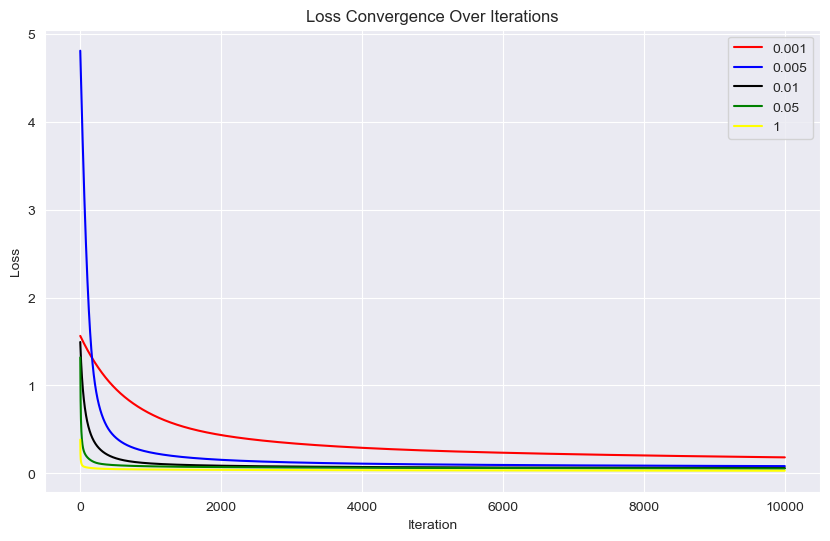

In [114]:
learning_rates = [0.001, 0.005, 0.01, 0.05, 1]

loss_histories = []
best_accuracy = 0.0
best_learning_rate = 0.0

for learning_rate in learning_rates:
    gradient_descent.set_learning_rate(learning_rate)
    logistic_regression = LogisticRegression()
    loss_histories.append(logistic_regression.fit(X_train_bc, y_train_bc, gradient_descent.gradient_descent))
    acc = logistic_regression.accuracy(y_val_bc, logistic_regression.predict(X_val_bc))
    if acc > best_accuracy:
        best_accuracy = acc
        best_learning_rate = learning_rate

print(f"Best learning rate: {best_learning_rate} with accuracy {best_accuracy}")
plot_gradient_loss(loss_histories, learning_rates, ['red','blue','black','green','yellow'])

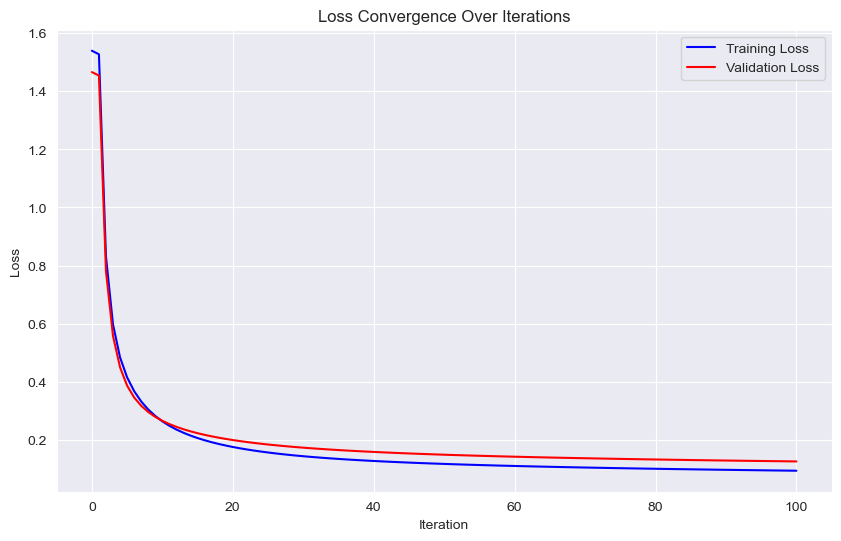

In [115]:
# Check the learning curve
logistic_regression = LogisticRegression()
gradient_descent.set_learning_rate(best_learning_rate)
train_loss, val_loss = train_with_validation(logistic_regression, X_train_bc, y_train_bc, X_val_bc, y_val_bc, gradient_descent)

plot_gradient_loss([train_loss, val_loss], ['Training Loss', 'Validation Loss'], ['blue', 'red'])

Find the best threshold

In [118]:
# Find the best threshold
thresholds = np.arange(0.0, 1.0, 0.005).tolist()

logistic_regression.fit(X_train_bc, y_train_bc, gradient_descent.gradient_descent)
y_hat_cv_lr = logistic_regression.predict(X_val_bc)
best_threshold = 0.0
best_accuracy = 0.0

for i, threshold in enumerate(thresholds):
    accuracy = logistic_regression.accuracy(y_val_bc, y_hat_cv_lr, threshold)

    if accuracy > best_accuracy:
        best_threshold = threshold
        best_accuracy = accuracy

print(f"Best threshold: {best_threshold} with accuracy {best_accuracy}")

Best threshold: 0.365 with accuracy 0.9882352941176471


##### Find the best iterations

In [119]:
iter_lists = np.arange(1e3, 1e5+1e1, 1e3).tolist()
gradient_descent = GradientDescent()

best_iters = 0
best_accuracy = 0.0
error_list = []
trained_coef_logistic = None

for num_iter in iter_lists:
    logistic_regression = LogisticRegression()
    gradient_descent.set_max_iter(num_iter)
    logistic_regression.fit(X_train_bc, y_train_bc, gradient_descent.gradient_descent)
    y_hat_cv_lr = logistic_regression.predict(X_val_bc)

    acc = logistic_regression.accuracy(y_val_bc, y_hat_cv_lr, threshold=best_threshold)
    error_list.append(acc)  # Append the error

    if acc >= best_accuracy:
        best_accuracy = acc
        best_iters = num_iter
        trained_coef_logistic = logistic_regression.get_coef()

print(f"Best iters: {best_iters} with accuracy {best_accuracy}")

Best iters: 98000.0 with accuracy 0.9882352941176471


In [120]:
logistic_regression = LogisticRegression()
logistic_regression.set_coef(trained_coef_logistic)

y_hat_test_logistic = logistic_regression.predict(X_test_bc)
acc = logistic_regression.accuracy(y_test_bc, y_hat_test_logistic, threshold=best_threshold)
print(f"Test accuracy: {acc} with threshold {best_threshold}")

Test accuracy: 0.9883720930232558 with threshold 0.365


<hr>
<h4>Linear Regression VS. Logistic Regression using AUROC</h4>

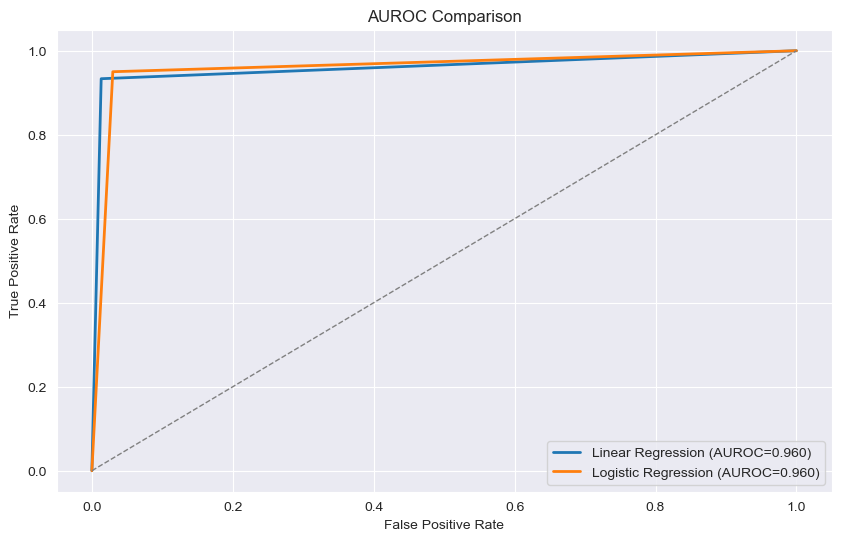

In [142]:
X_cv_bc = pd.concat([X_train_bc, X_val_bc], axis=0)
y_cv_bc = pd.concat([y_train_bc, y_val_bc], axis=0)

y_true_lin, y_pred_lin_cv = cross_validate(linear_regression, X_cv_bc, y_cv_bc)
y_true_log, y_pred_log_cv = cross_validate(logistic_regression, X_cv_bc, y_cv_bc)

models_data = [
    (y_true_lin, np.array([1 if val > 0.425 else 0 for val in y_pred_lin_cv]), "Linear Regression"),
    (y_true_log, np.array([1 if val > 0.365 else 0 for val in y_pred_log_cv]), "Logistic Regression"),
]

plot_auroc(models_data)

<hr>
<h4>Compare Simple Regression and Logistic Regression on Coefficient</h4>

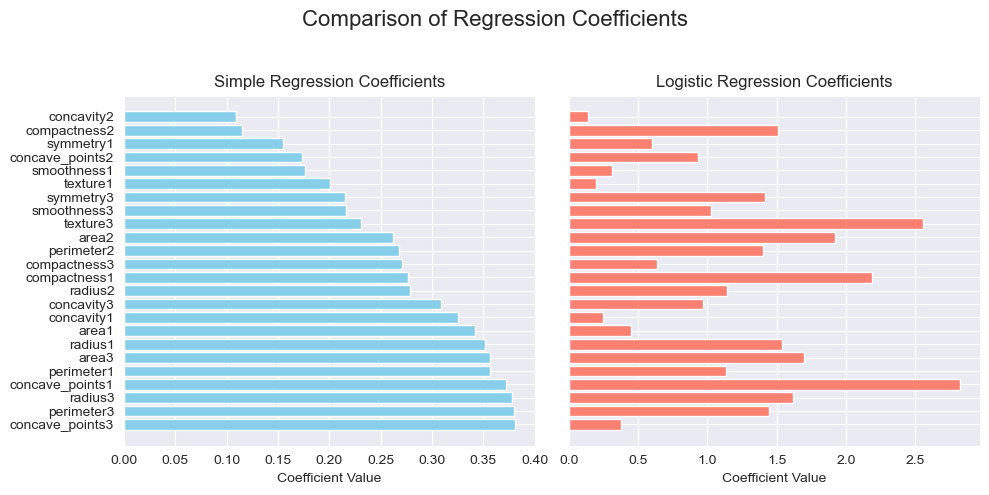

In [124]:
log_coef = pd.DataFrame({
    'Feature': important_features,
    'Logistic Regression': np.abs(trained_coef_logistic[1:].flatten())
})

coef_df = pd.merge(importance_df_bc, log_coef, how='right',on='Feature')
coef_df = coef_df.reindex(coef_df['Importance'].abs().sort_values(ascending=False).index)

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axes[0].barh(coef_df['Feature'], coef_df['Importance'], color='skyblue')
axes[0].set_title('Simple Regression Coefficients')
axes[0].set_xlabel('Coefficient Value')
axes[0].invert_yaxis()  # Highest coefficient at the top

axes[1].barh(coef_df['Feature'], coef_df['Logistic Regression'], color='salmon')
axes[1].set_title('Logistic Regression Coefficients')
axes[1].set_xlabel('Coefficient Value')
axes[1].invert_yaxis()

plt.suptitle("Comparison of Regression Coefficients", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<hr>
<h4>Wine Recognition Dataset</h4>
1. <b>Use Multi-Class Linear Regression on Wine Recognition Dataset</b>

In [125]:
multiclass_linear_regression = MultiClassLinearRegression()
y_true, y_hat_mclin = cross_validate(multiclass_linear_regression, X_scaled_df_wr, encoded_target_df)
acc = multiclass_linear_regression.accuracy(y_true, y_hat_mclin)
print(f"Wine Recognition Accuracy using Multiclass Linear Regression 5-fold CV: {acc}")

Wine Recognition Accuracy using Multiclass Linear Regression 5-fold CV: 0.9962546816479401


2. <b>Use Multi-Class Logistic Regression on Wine Recognition Dataset</b>

In [126]:
multiclass_logistic_regression = MultiClassLogisticRegression()
mce_train_loss = multiclass_logistic_regression.fit(X_train_wr, y_train_wr)
mce_val_loss = multiclass_logistic_regression.fit(X_val_wr, y_val_wr)

# Check the gradients
diff_grad = multiclass_logistic_regression.check_grad(X_train_wr, y_train_wr)
print(f"Gradient Checking differences on training data: {diff_grad}")

Gradient Checking differences on training data: 3.6920729128367686e-15


Best learning rate: 0.001 with accuracy 1.0


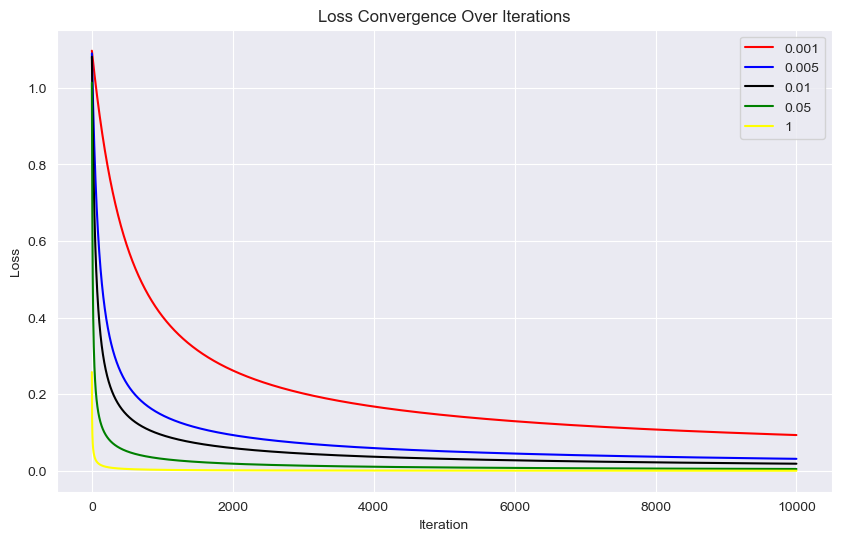

In [127]:
learning_rates = [0.001, 0.005, 0.01, 0.05, 1]

loss_histories = []
best_accuracy = 0.0
best_learning_rate = 0.0

gradient_descent = GradientDescent()

for learning_rate in learning_rates:
    gradient_descent.set_learning_rate(learning_rate)
    multiclass_logistic_regression = MultiClassLogisticRegression()
    loss_history = multiclass_logistic_regression.fit(X_train_wr, y_train_wr, gradient_descent.gradient_descent)
    loss_histories.append(loss_history)
    acc = multiclass_logistic_regression.accuracy(y_val_wr, multiclass_logistic_regression.predict(X_val_wr))

    if acc > best_accuracy:
        best_accuracy = acc
        best_learning_rate = learning_rate

print(f"Best learning rate: {best_learning_rate} with accuracy {best_accuracy}")
plot_gradient_loss(loss_histories, learning_rates, ['red','blue','black','green','yellow'])

Find the best number of iterations.

In [128]:
iter_lists = np.arange(1e3, 1e5, 5e2).tolist()
gradient_descent = GradientDescent()

best_iters = 0
best_accuracy = 0.0
error_list = []
trained_coef_ml = None

for num_iter in iter_lists:
    multiclass_logistic_regression = MultiClassLogisticRegression()
    gradient_descent.set_max_iter(num_iter)

    multiclass_logistic_regression.fit(X_train_wr, y_train_wr, gradient_descent.gradient_descent)
    y_hat_cv_lr = multiclass_logistic_regression.predict(X_val_wr)

    acc = multiclass_logistic_regression.accuracy(y_val_wr, y_hat_cv_lr)
    error_list.append(acc)  # Append the error

    if acc >= best_accuracy:
        best_accuracy = acc
        best_iters = num_iter
        trained_coef_ml = multiclass_logistic_regression.get_weights()

print(f"Best iters: {best_iters} with accuracy {best_accuracy}")

Best iters: 9500.0 with accuracy 1.0


In [129]:
multiclass_logistic_regression = MultiClassLogisticRegression()
y_true, y_hat_mclog = cross_validate(multiclass_logistic_regression, X_scaled_df_wr, encoded_target_df)
acc = multiclass_logistic_regression.accuracy(y_true, y_hat_mclog)
print(f"Wine Recognition Accuracy using Multiclass Logistic Regression 5-fold CV: {acc}")

Wine Recognition Accuracy using Multiclass Logistic Regression 5-fold CV: 0.9925093632958801


In [130]:
multiclass_logistic_regression = MultiClassLogisticRegression()
multiclass_logistic_regression.set_weights(trained_coef_ml)
y_hat_test_lr = multiclass_logistic_regression.predict(X_test_wr)
acc = multiclass_logistic_regression.accuracy(y_test_wr, y_hat_test_lr)
print(f"Test accuracy: {acc}")

Test accuracy: 1.0


<h5>Compare Multi-class Linear and Multi-class Logistic regressions on Coefficient</h5>

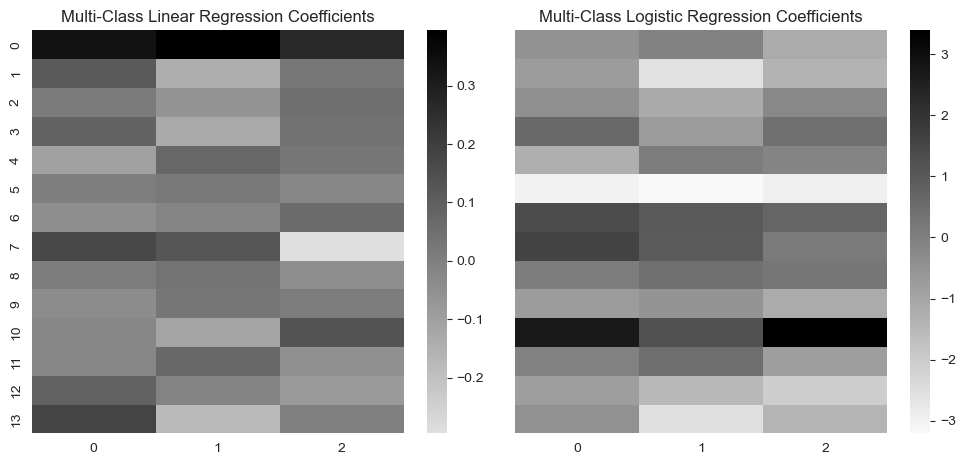

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.heatmap(multiclass_linear_regression.get_weights(), cmap='gray_r', center=0, ax=axes[0])
axes[0].set_title('Multi-Class Linear Regression Coefficients')

sns.heatmap(multiclass_logistic_regression.get_weights(), cmap='gray_r', center=0, ax=axes[1])
axes[1].set_title('Multi-Class Logistic Regression Coefficients')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('figures/multiclass_linear_regression_coefficients.png')
plt.show()

<hr>
<hr>
<h3>5. Other Experiments</h3>
We are going to try our other machine learning models, such as KNN and Decision Tree on both binary and Multi-Class datasets.

In [148]:
from sklearn.neighbors import KNeighborsClassifier

# Ensure y_train_bc and y_test_bc are 1D arrays
y_train_knn = y_train_bc.values.ravel() if hasattr(y_train_bc, "values") else y_train_bc.ravel()
y_test_knn  = y_test_bc.values.ravel()  if hasattr(y_test_bc, "values") else y_test_bc.ravel()

# Initialize and fit the KNN
knn = KNeighborsClassifier(n_neighbors=5)
# --- Breast Cancer -Data--
knn.fit(X_train_bc, y_train_bc)

tune_parameter = {
    'n_neighbors': [3,5,7, 9],
    'metric': ['euclidean', 'manhattan'],
}

best_neighbor = None
best_metric = None
best_acc = 0.0

for n_neighbors in tune_parameter['n_neighbors']:
    for metric in tune_parameter['metric']:
        knn.set_params(n_neighbors=n_neighbors, metric=metric)
        acc = knn.score(X_val_bc, y_val_bc)

        if acc > best_acc:
            best_acc = acc
            best_neighbor = n_neighbors
            best_metric = metric

print(f"Best neighbor: {best_neighbor} with metric {best_metric} with validation-set accuracy {best_acc}")
knn.set_params(n_neighbors=best_neighbor, metric=best_metric)
test_acc_knn_bc = knn.score(X_test_bc, y_test_bc)
y_hat_test_knn_bc = knn.predict(X_test_bc)
print(f"KNN Test on Breast Cancer Data accuracy: {test_acc_knn_bc}")

# --- Wine Recognition ---
# Convert one-hot encoded target to integer labels
y_wr_int = np.argmax(encoded_target_df.values, axis=1)

# Split the dataset (here using 80/20 train-test split, adjust as needed)
X_train_wr, X_test_wr, y_train_wr, y_test_wr = train_test_split(X_scaled_df_wr, y_wr, test_size=0.2, random_state=42, stratify=y_wr)
X_val_wr, X_test_wr, y_val_wr, y_test_wr = train_test_split(X_test_wr, y_test_wr, test_size=0.5, random_state=42, stratify=y_test_wr)

# Initialize the KNN classifier for multi-class (default uses majority vote)
knn_multi = KNeighborsClassifier(n_neighbors=5)
knn_multi.fit(X_train_wr, y_train_wr)

best_neighbor = None
best_metric = None
best_acc = 0.0

for n_neighbors in tune_parameter['n_neighbors']:
    for metric in tune_parameter['metric']:
        knn_multi.set_params(n_neighbors=n_neighbors, metric=metric)
        acc = knn_multi.score(X_val_wr, y_val_wr)

        if acc > best_acc:
            best_acc = acc
            best_neighbor = n_neighbors
            best_metric = metric

print(f"\nBest neighbor: {best_neighbor} with metric {best_metric} with validation-set accuracy {best_acc}")
knn_multi.set_params(n_neighbors=best_neighbor, metric=best_metric)
test_acc_knn_bc = knn_multi.score(X_test_wr, y_test_wr)
print(f"Multi KNN Test on Wine Recogonition Data accuracy: {test_acc_knn_bc}")

Best neighbor: 3 with metric euclidean with validation-set accuracy 0.9647058823529412
KNN Test on Breast Cancer Data accuracy: 0.9651162790697675

Best neighbor: 5 with metric euclidean with validation-set accuracy 1.0
Multi KNN Test on Wine Recogonition Data accuracy: 0.9444444444444444


/Users/junghooncho/miniconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/junghooncho/miniconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [150]:
from sklearn.tree import DecisionTreeClassifier

# Ensure y_train_bc, y_val_bc, and y_test_bc are 1D arrays.
y_train_dt = y_train_bc.values.ravel() if hasattr(y_train_bc, "values") else y_train_bc.ravel()
y_val_dt   = y_val_bc.values.ravel()   if hasattr(y_val_bc, "values") else y_val_bc.ravel()
y_test_dt  = y_test_bc.values.ravel()  if hasattr(y_test_bc, "values") else y_test_bc.ravel()

# Define a parameter grid for tuning.
tune_params = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# --- Breast Cancer -Data--
best_acc_dt = 0.0
best_params_dt = None
best_dt = None

# Loop over all parameter combinations.
for max_depth in tune_params['max_depth']:
    for min_samples_split in tune_params['min_samples_split']:
        for criterion in tune_params['criterion']:
            dt_model = DecisionTreeClassifier(max_depth=max_depth,
                                              min_samples_split=min_samples_split,
                                              criterion=criterion,
                                              random_state=42)
            dt_model.fit(X_train_bc, y_train_dt)
            val_acc = dt_model.score(X_val_bc, y_val_dt)
            if val_acc > best_acc_dt:
                best_acc_dt = val_acc
                best_params_dt = (max_depth, min_samples_split, criterion)
                best_dt = dt_model

print("Best Decision Tree parameters (Breast Cancer):", best_params_dt, "with validation accuracy:", best_acc_dt)
y_hat_test_dt_bc = knn.predict(X_test_bc)
# Evaluate on the test set.
test_acc_dt = best_dt.score(X_test_bc, y_test_dt)
print("Test accuracy (Breast Cancer):", test_acc_dt)

# --- Wine Recognition ---
best_acc_dt_wr = 0.0
best_params_dt_wr = None
best_dt_wr = None

# Loop over all parameter combinations.
for max_depth in tune_params['max_depth']:
    for min_samples_split in tune_params['min_samples_split']:
        for criterion in tune_params['criterion']:
            dt_model_wr = DecisionTreeClassifier(max_depth=max_depth,
                                                 min_samples_split=min_samples_split,
                                                 criterion=criterion,
                                                 random_state=42)
            dt_model_wr.fit(X_train_wr, y_train_wr)
            val_acc = dt_model_wr.score(X_val_wr, y_val_wr)
            if val_acc > best_acc_dt_wr:
                best_acc_dt_wr = val_acc
                best_params_dt_wr = (max_depth, min_samples_split, criterion)
                best_dt_wr = dt_model_wr

print("\nBest Decision Tree parameters (Wine Recognition):", best_params_dt_wr, "with validation accuracy:", best_acc_dt_wr)

# Evaluate on the test set.
test_acc_dt_wr = best_dt_wr.score(X_test_wr, y_test_wr)
print("Test accuracy (Wine Recognition):", test_acc_dt_wr)

Best Decision Tree parameters (Breast Cancer): (None, 2, 'entropy') with validation accuracy: 0.9176470588235294
Test accuracy (Breast Cancer): 0.9534883720930233

Best Decision Tree parameters (Wine Recognition): (None, 2, 'gini') with validation accuracy: 1.0
Test accuracy (Wine Recognition): 0.8888888888888888


<hr>
<h4>Compare the AUROC on different model using Breast Cancer Dataset</h4>

In [135]:
linear = LinearRegression()
linear.fit(X_train_bc, y_train_bc)
linear.accuracy(y_val_bc, linear.predict(X_val_bc))

a, b = cross_validate(linear, X_train_bc, y_train_bc)
linear.accuracy(a, b)

0.9472361809045227

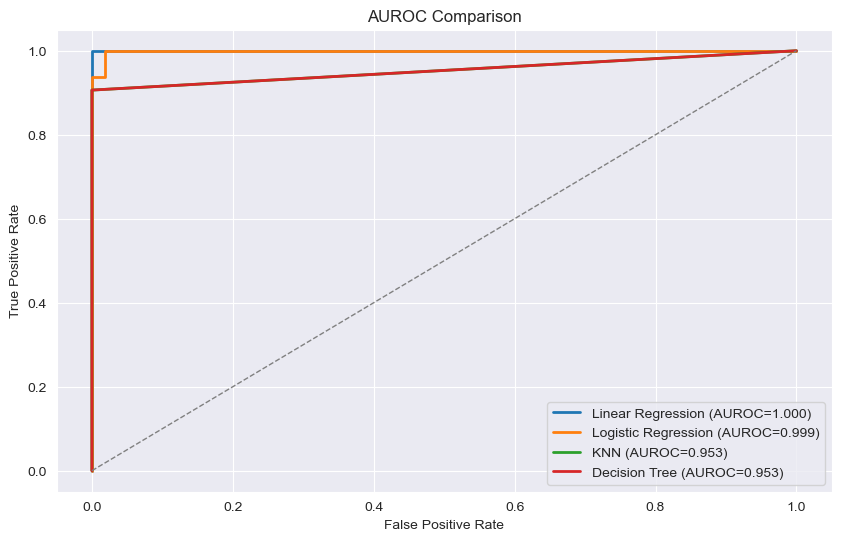

In [152]:
models_data = [
    (y_test_bc, y_hat_test_linear, "Linear Regression"),
    (y_test_bc, y_hat_test_logistic, "Logistic Regression"),
    (y_test_bc, y_hat_test_knn_bc, "KNN"),
    (y_test_bc, y_hat_test_dt_bc, "Decision Tree"),
]

plot_auroc(models_data)